In [74]:
%pylab inline
import pandas as pd
import seaborn as sns
import numpy as np
import time as tm
import math as mt
import sys as ss
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


# Import CSV and load into Pandas DataFrame

In [6]:
data = pd.read_csv('/Users/manu/Desktop/TOSCA/Python_Activity1.csv')

In [7]:
dframe = pd.DataFrame(data)

In [8]:
dframe

,Location Name,Material,Unique ID,Jan,Feb,Mar,Apr,May,Jun,AvgTurns,Sum of Avg Days Still Out,Sum of Loss Rate,Sum of Lost RPC Qty,Sum of Still Out Qty,Avg Turns (Data Clean)
0,A&T Farms,6413.0,A&T Farms6413,NaN,,NaN,NaN,NaN,NaN,7.15,78.20,0.00%,0.0,"15,065",7.15
1,A&T Farms,6416.0,A&T Farms6416,NaN,NaN,NaN,NaN,NaN,NaN,12.64,71.79,0.00%,0.0,"6,725",0.00
2,A&T Farms,6425.0,A&T Farms6425,NaN,NaN,NaN,NaN,NaN,NaN,11.29,18.16,0.00%,0.0,25,0.00
3,Agencia Aduanal Mayer Martinez (Marengo),6411.0,Agencia Aduanal Mayer Martinez (Marengo)6411,NaN,NaN,NaN,NaN,NaN,NaN,5.66,106.41,0.00%,0.0,313,5.66
4,Agencia Aduanal Mayer Martinez (Marengo),6413.0,Agencia Aduanal Mayer Martinez (Marengo)6413,NaN,NaN,NaN,NaN,NaN,NaN,11.07,32.68,0.00%,0.0,391,0.00
5,Agencia Aduanal Mayer Martinez (Marengo),6419.0,Agencia Aduanal Mayer Martinez (Marengo)6419,9900.0,NaN,NaN,9900.0,NaN,NaN,16.59,74.75,0.00%,0.0,4,0.00
6,Agencia Aduanal Mayer Martinez (Marengo),6423.0,Agencia Aduanal Mayer Martinez (Marengo)6423,NaN,NaN,NaN,NaN,NaN,NaN,7.83,61.40,0.27%,270.0,"18,747",7.83
7,Agri Packing,6408.0,Agri Packing6408,NaN,NaN,NaN,NaN,NaN,NaN,6.93,66.65,0.01%,296.0,"119,472",6.93
8,Agri Packing,6411.0,Agri Packing6411,NaN,NaN,NaN,NaN,NaN,NaN,5.52,37.16,0.00%,10.0,"24,047",5.52
9,Agri Packing,6413.0,Agri Packing6413,NaN,NaN,NaN,NaN,NaN,NaN,5.45,37.72,0.13%,116.0,"24,574",5.45


In [9]:
dframe.index

RangeIndex(start=0, stop=1520, step=1)

In [10]:
dframe.columns

Index(['Location Name', 'Material', 'Unique ID', 'Jan', 'Feb', 'Mar', 'Apr',
       'May', 'Jun', 'AvgTurns', 'Sum of Avg Days Still Out',
       'Sum of Loss Rate', 'Sum of Lost RPC Qty', 'Sum of Still Out Qty',
       'Avg Turns (Data Clean)'],
      dtype='object')

In [12]:
%matplotlib inline

In [13]:
material = dframe['Material']

In [14]:
material=material.astype(float)

Text(0.5,0,'Material Quantity')

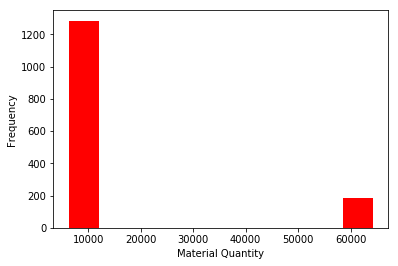

In [89]:
material.plot.hist(bins = 10, color = 'Red')
plt.xlabel('Material Quantity')

In [16]:
AvgTurn = dframe['AvgTurns']

In [17]:
AvgTurn = AvgTurn.astype(float)

Text(0.5,0,'Avg Turns')

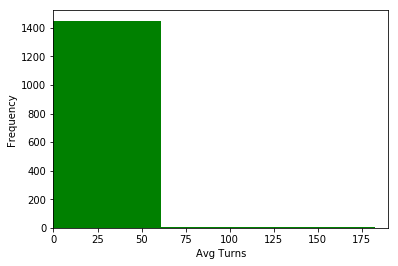

In [84]:
AvgTurn.plot.hist(bins = 15, color = 'Green',xlim = (0,190))
plt.xlabel('Avg Turns')

In [19]:
JanAct = dframe['Jan']

In [20]:
JanAct = JanAct.astype(float)

Text(0.5,0,'Actual Totals')

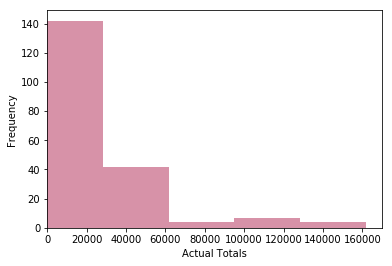

In [83]:
JanAct.plot.hist(bins = 10, color = "#AA154476",xlim = (0,170000))
plt.xlabel('Actual Totals')

# Analysis by material size(Horizontal bar graphs)

In [22]:
dframe['Material'].unique()

array([ 6413.,  6416.,  6425.,  6411.,  6419.,  6423.,  6408.,  6428.,
       64190., 64199., 64239., 64280., 64289., 64250.,  6317.,  6332.,
       64259., 64160., 64169., 64090., 64110.,  6300.,    nan])

In [23]:
dframe = dframe.dropna(subset = ['Material'])

In [24]:
dframe['Material'].unique()

array([ 6413.,  6416.,  6425.,  6411.,  6419.,  6423.,  6408.,  6428.,
       64190., 64199., 64239., 64280., 64289., 64250.,  6317.,  6332.,
       64259., 64160., 64169., 64090., 64110.,  6300.])

In [25]:
group_by_material = dframe.groupby(by=['Material'])
material_avg = group_by_material.mean()
material_count = group_by_material.count()

In [26]:
material_count_series = material_count.iloc[:,0]

# January Actuals

In [27]:
Jan_Act = pd.DataFrame({'Jan':material_avg['Jan'], 'OkActuals':material_count_series})

In [28]:
alt_method = material_avg.merge(material_count,left_index=True, right_index=True, suffixes=['_avg','_count'])

Text(0.5,0,'Ship Quantity')

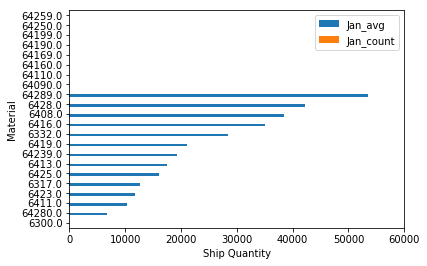

In [76]:
alt_method[['Jan_avg','Jan_count']].sort_values(by=['Jan_avg','Jan_count'],ascending=True).plot.barh(xlim = (0,60000),ylim = (6300.0,64289.0))
plt.xlabel('Ship Quantity')

# March Actuals

In [30]:
Mar_Act = pd.DataFrame({'Mar':material_avg['Mar'], 'OkActuals':material_count_series})

In [31]:
alt_method_Mar = material_avg.merge(material_count,left_index=True, right_index=True,suffixes=['_avg','_count'])

Text(0.5,0,'Ship Quantity')

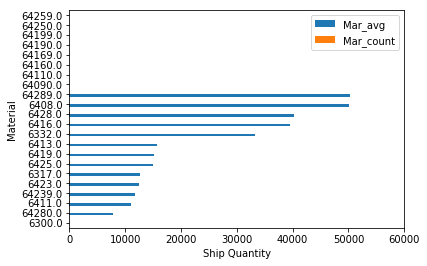

In [77]:
alt_method_Mar[['Mar_avg','Mar_count']].sort_values(by=['Mar_avg','Mar_count'],ascending=True).plot(kind='barh',xlim = (0,60000))
plt.xlabel('Ship Quantity')

# April Actuals 

In [54]:
Apr_Act = pd.DataFrame({'Apr':material_avg['Apr'], 'OkActuals':material_count_series})

In [50]:
ax= material_avg.merge(material_count,left_index=True, right_index=True,suffixes=['_avg','_count'])

Text(0.5,0,'Ship Quantity')

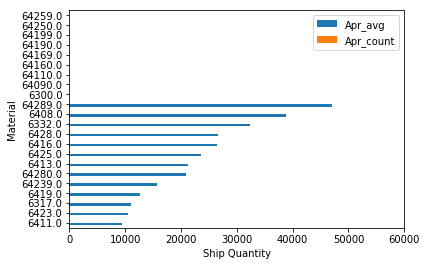

In [78]:
ax[['Apr_avg','Apr_count']].sort_values(by=['Apr_avg','Apr_count'],ascending=True).plot(kind='barh',xlim = (0,60000))
plt.xlabel('Ship Quantity')

# Average Turns by material size

In [36]:
Avg_Turns = pd.DataFrame({'AvgTurns':material_avg['AvgTurns'], 'OkActuals':material_count_series})

In [37]:
Avg_Turns_Method = material_avg.merge(material_count,left_index=True, right_index=True,suffixes=['_avg','_count'])

Text(0.5,0,'Frequency')

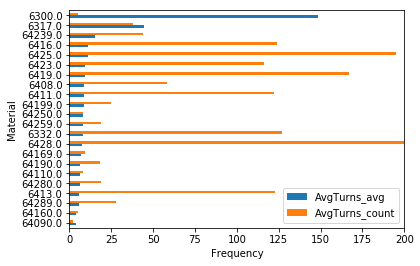

In [81]:
Avg_Turns_Method[['AvgTurns_avg','AvgTurns_count']].sort_values(by=['AvgTurns_avg','AvgTurns_count'],ascending=True).plot(kind='barh',xlim = (0,200))
plt.xlabel('Frequency')

# Visualization with Seaborn

In [114]:
corr = dframe.loc[:,dframe.dtypes == 'float64'].corr()
y=dframe.iloc[:,8].values
X=dframe.iloc[:,8].values

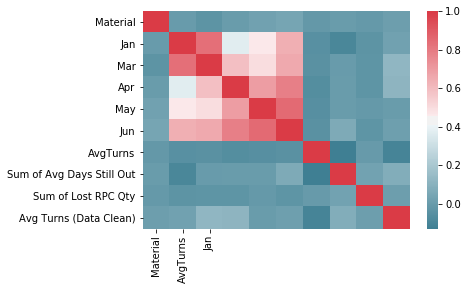

In [115]:
sns.heatmap(corr, xticklabels=dframe2.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))